In [1]:
import os
import logging
import argparse
import random
import numpy as np
import torch
from KEMCE.dataset import LabelsForData
import collections
from KEMCE.utils import ConceptEvaluation
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import heapq
import operator

In [2]:
data_path = '../'

sigle_dx_file = data_path + 'ccs/ccs_single_dx_tool_2015.csv'
multi_dx_file = data_path + 'ccs/ccs_multi_dx_tool_2015.csv'

In [3]:
label4data = LabelsForData(multi_dx_file, sigle_dx_file)

In [4]:
pretrained_dir = os.path.join(data_path, 'outputs/kemce/models/seq_prediction/dx_20_dag_pos/')
weights_path = os.path.join(pretrained_dir, 'pytorch_model.bin_11')

model = torch.load(weights_path)

In [5]:
model

DiagnosisPrediction(
  (encoder_visit): BertEncoderDag(
    (layer): ModuleList(
      (0): BertLayerDag(
        (attention): BertAttentionDag(
          (self): BertSelfAttention(
            (query): Linear(in_features=200, out_features=200, bias=True)
            (key): Linear(in_features=200, out_features=200, bias=True)
            (value): Linear(in_features=200, out_features=200, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=200, out_features=200, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (self_dag): BertSelfAttention(
            (query): Linear(in_features=200, out_features=200, bias=True)
            (key): Linear(in_features=200, out_features=200, bias=True)
            (value): Linear(in_features=200, out_features=200, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
   

In [6]:
embeddings = model.embed_dag.weight.cpu().detach().numpy()

In [7]:
embeddings.shape

(4349, 200)

In [8]:
dict_f = os.path.join(data_path, 'outputs/kemce/data/seq_prediction/mimic.types')
dict_vocab = pickle.load(open(dict_f, 'rb'))

In [9]:
dict_inverse_seqs = {v:k for k,v in dict_vocab.items()}

In [10]:
eval = ConceptEvaluation(dict_inverse_seqs, label4data)

In [11]:
x_2d, labels = eval.get_sample_tsne(embeddings, 1000)

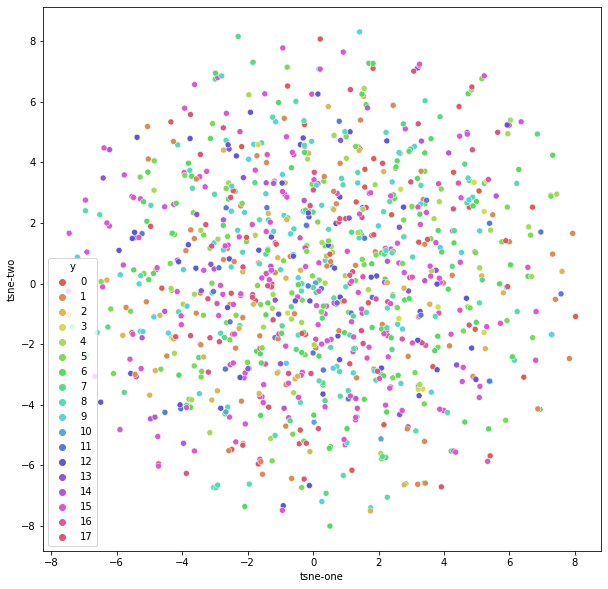

In [12]:
cms_df_subset={}
cms_df_subset['tsne-one'] = x_2d[:,0]
cms_df_subset['tsne-two'] = x_2d[:,1]
cms_df_subset['y'] = np.array(labels)
plt.figure(figsize=(10,10))
# ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 18),
    data=cms_df_subset,
#     legend="full",
    alpha=1,
#     ax=ax1
)